## 머신러닝
# 과적합 이슈

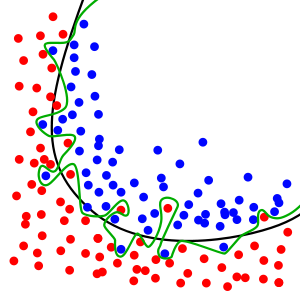 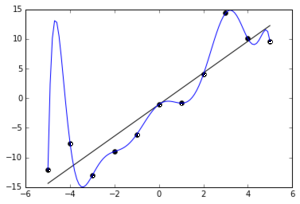

### 중요한 것은 새로운 데이터에 대해 잘 예측하는 것이다
- 주어진 데이터에 대해 잘 들어맞는 아무리 훌륭한 예측 모델을 만들었다 하더라도, 새로운 데이터에 대한 예측 능력이 떨어진다면 아무런 의미가 없게 된다.
- 머신러닝은 기본적으로 주어진 데이터와 새로운 데이터가 비슷한 패턴을 가질 것이라는 가정에 기반하고 있다. 다만 그렇게 되려면 주어진 데이터가 발생 가능한 모든 데이터를 대표할 수 있는 샘플들로 이루어져야 할 것이다. 하지만 이것은 현실적으로 불가능하다.
- 이러한 문제는 주어진 데이터가 과연 **일반성**을 가지는가 라는 질문이 된다. 주어진 데이터가 일반성을 가지기 위한 가장 좋은 방법은 데이터를 아주 많이 확보하는 것이다. 발생 가능한 샘플 수가 10,000개 인데, 7,000개 정도의 데이터를 확보했다면 아주 정확한 모델을 만들 수 있는 것은 자명하다. 하지만 현실적으로 충분한 데이터를 확보하는 것은 머신러닝에서 가장 어려운 문제이다.
- 또한 충분한 데이터를 확보했다 하더라도, 그 데이터 안에는 오류인 데이터도 있고 아주 드물게 발생하는 이상치도 포함되어 있을 수 밖에 없다. 그러므로 주어진 데이터가 많던 적던 너무 주어진 데이터에 딱 들어맞는 예측모델을 만드는 것은 예측 능력을 떨어트릴 수 있다.
- 이와 같이, 너무 지나치게 훈련 데이터에 치우친 복잡한 모델은 **과대적합(overfitting)** 되었다고 하고, 너무 지나치게 예측 모델을 단순하게 만들어 훈련 데이터의 특징을 제대로 나타내지 못할 때 **과소적합(underfitting)** 이라고 한다.

### 미래의 데이터는 구할 수 없다
- 새로운 데이터에 대해 잘 예측하기 위해서는, 가능한 한 많은 데이터를 수집하되 너무 지나치게 확보한 데이터에 치우친 복잡한 예측모델을 만들지 않고 최대한 일반화 할 수 있는 예측모델을 만들 수 있는 능력을 가져야 한다.
- 이를 위해 가장 좋은 방법은 충분한 데이터로 예측 모델을 만든 다음, 이 모델로 새로 발생하는 많은 데이터로 테스트를 해 보는 것이다. 하지만 새로운 데이터를 확보하는 것은 미래의 일이어서 사실 불가능하다.
- 이러한 과대적합/과소적합/일반성 의 문제를 해결하기 위해, 주어진 데이터에서 일부분은 **훈련세트** 로 하고, 나머지는 **테스트세트** 로 구성하여 훈련세트로 예측모델을 만든 다음에 테스트세트로 이 예측모델을 **검증** 하는 절차를 밟게 된다.
> train_test_split()
- 이럴 경우 훈련세트는 과거에 발생해서 내가 확보하고 있는 데이터에 해당하고, 테스트세트는 미래에 새로 발생할 데이터에 해당한다고 하겠다.
- 앞에서 충분한 데이터량을 확보하는 것이 가장 중요하다고 했다. 그렇다면 얼마나 충분한 데이터를 확보해야 할까? 이것은 해결하려는 문제마다 다르고 데이터의 성격에 따라 다르기 때문에 일반적인 답을 하기는 쉽지 않다. 한 가지 고려할 점은 속성(열)의 갯수가 늘어나고 모델이 복잡함에 따라 그 만큼 데이터량도 늘어나야 한다는 점이다.
- 결론적으로, 충분히 복잡하면서도 가능한 단순한 예측모델이 필요하다.

### k-NN 에서 k 값을 바꿔가며 점수 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target) # 25% for test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
ks = np.arange(1,51)
train_scores = []
test_scores = []

for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

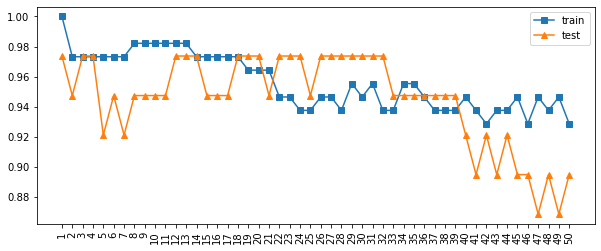

In [30]:
plt.figure(figsize=[10,4])
plt.plot(train_scores, 's-')
plt.plot(test_scores, '^-')
plt.legend(['train', 'test'])
plt.xticks(range(len(ks)), ks, rotation=90) # 눈금을 1~50 으로 지정
pass

### 다항식 곡선 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [29]:
X = iris.data[:, [0]]
y = iris.data[:, 2]

In [30]:
model1 = LinearRegression() # 선형회귀
model1.fit(X, y)

LinearRegression()

In [31]:
model1.coef_, model1.intercept_

(array([1.85843298]), -7.101443369602455)

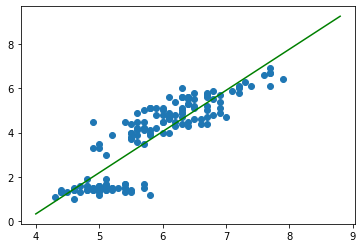

In [40]:
plt.scatter(x, y)

xs = np.arange(4, 9, 0.2)
ys = model1.predict(xs.reshape(-1,1))
plt.plot(xs, ys, 'g')

In [33]:
x = iris.data[:,0]
X = np.c_[x, x**2]
X.shape

(150, 2)

In [34]:
model2 = LinearRegression() # 2차곡선
model2.fit(X, y)

LinearRegression()

In [35]:
model2.coef_, model2.intercept_

(array([ 5.39216416, -0.29585934]), -17.446713871472316)

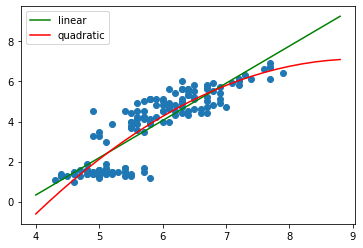

In [39]:
plt.scatter(x, y)

xs = np.arange(4, 9, 0.2)

ys = model1.predict(xs.reshape(-1,1))
plt.plot(xs, ys, 'g', label='linear')

ys = model2.predict(np.c_[xs, xs**2])
plt.plot(xs, ys, 'r', label='quadratic')

plt.legend()

In [41]:
X = np.c_[x, x**2, x**3]
X.shape

(150, 3)

In [42]:
model3 = LinearRegression() # 3차곡선
model3.fit(X, y)

LinearRegression()

In [43]:
model3.coef_, model3.intercept_

(array([-13.58080456,   2.87675023,  -0.17422772]), 19.80280675963)

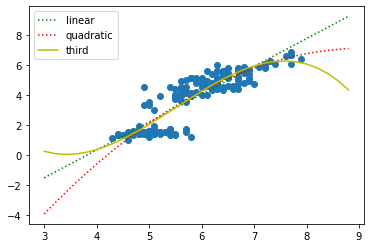

In [46]:
plt.scatter(x, y)

xs = np.arange(3, 9, 0.2)

ys = model1.predict(xs.reshape(-1,1))
plt.plot(xs, ys, 'g:', label='linear')

ys = model2.predict(np.c_[xs, xs**2])
plt.plot(xs, ys, 'r:', label='quadratic')

ys = model3.predict(np.c_[xs, xs**2, xs**3])
plt.plot(xs, ys, 'y', label='third')

plt.legend()